   # Derivation of acceleration from noisy gps signal
   



In [3]:
import numpy as np

import matplotlib.pyplot as plot

   ### Trajectory generation

In [4]:
#trajectory without noise

#Generating and plot the following trajectory for 𝑡 in the range 0-20 seconds of the car
#*𝑥_𝑡 = 50𝑠𝑖𝑛 0.1𝜋𝑡 and 𝑦_𝑡 =50𝑠𝑖𝑛 0.2𝜋𝑡


def x_t(t):
    return 50 * np.sin(0.1*np.pi*t)

def y_t(t):
    return 50 * np.sin(0.1*np.pi*t)

#trajectory with noise

#Generating new 𝑥 𝑡 and 𝑦 𝑡 coordinates of the trajectory adding a noise with a
#* 5 m average value and a 1 mm standard deviation

def x_t_noise(t,mean = 5 , sd = 0.001):#
    return 50 * np.sin(0.1*np.pi*t) + np.random.normal(mean,sd,1)

def y_t_noise(t,mean = 5 , sd = 0.001):
    return 50 * np.sin(0.1*np.pi*t) + np.random.normal(mean,sd,1)


In [5]:
time = np.arange(0, 20, 0.1) #timestamp for 20seconds

In [6]:
#lets now create a datasets without noise and with noise

x_t_data = x_t(time)
x_t_noisy_data = x_t_noise(time)

### Plotting theoretical and real values of x depends on t

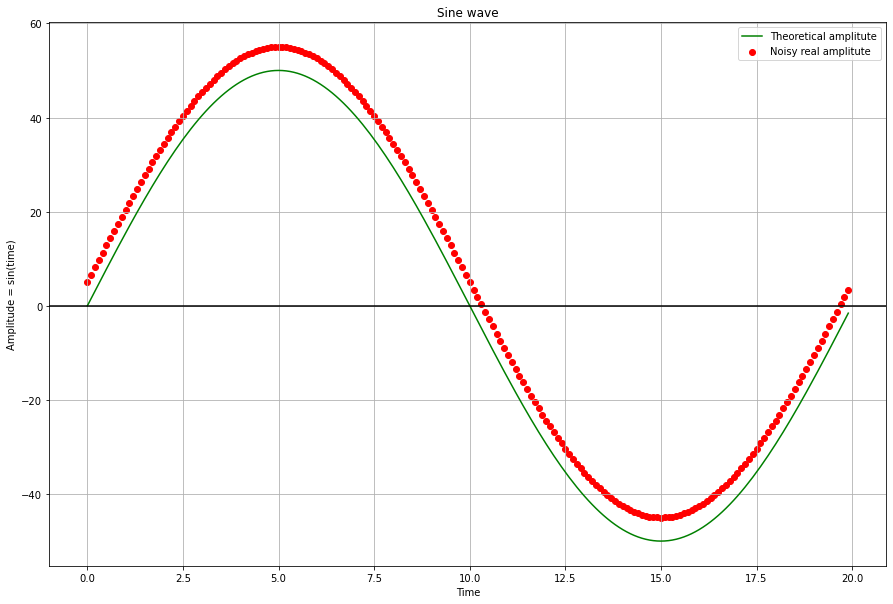

In [9]:
amplitude = x_t_data

noisy_amplitute = x_t_noisy_data

plot.plot(time, amplitude,color = 'green',label='Theoretical amplitute')

plot.scatter(time,noisy_amplitute,color ='red',label='Noisy real amplitute')

plot.rcParams["figure.figsize"] = (15,10)

plot.title('Sine wave')

plot.xlabel('Time')

plot.ylabel('Amplitude = sin(time)')

plot.grid(True, which='both')

plot.axhline(y=0, color='k')

plot.legend()

plot.show()



### Plotting theoretical and real values of y depends on t

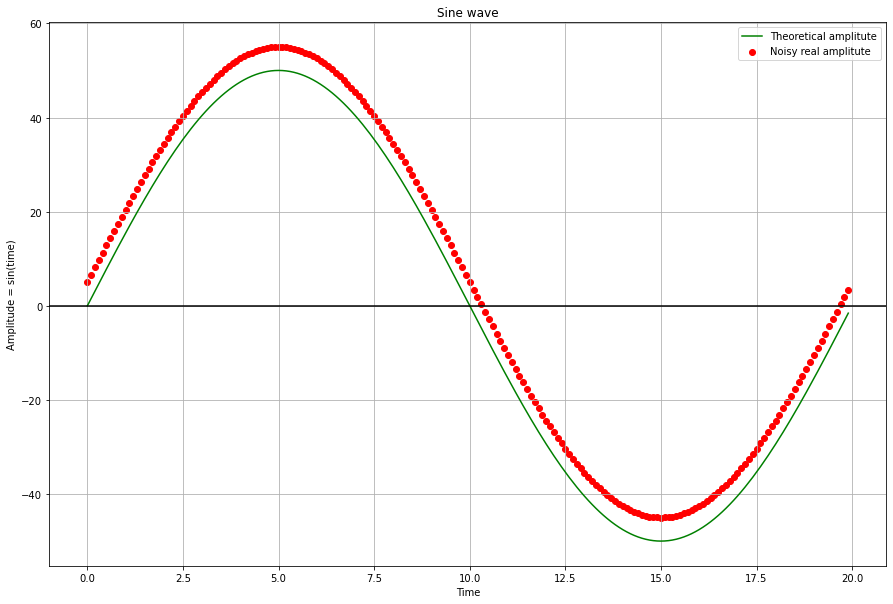

In [11]:
amplitude   = y_t(time) 

noisy_amplitute = y_t_noise(time)

plot.plot(time, amplitude,color = 'green',label='Theoretical amplitute')

plot.scatter(time,noisy_amplitute,color ='red',label='Noisy real amplitute')

plot.rcParams["figure.figsize"] = (15,10)

plot.title('Sine wave')

plot.xlabel('Time')

plot.ylabel('Amplitude = sin(time)')

plot.grid(True, which='both')

plot.axhline(y=0, color='k')

plot.legend()

plot.show()


### Plotting the corresponding a_x and a_y in the same timestamp

In [15]:
#The acceleration - the second-order derivative of the position. Without noisy 

def a_x(t):
    return -0.5*(np.pi)*np.sin(0.1*np.pi*t)

### Problem!

    We can easily get function of acceleration such that it is the second-order derivative of position with respect to time.
However, We don't have derivation of position which is noisy "gps signal".

### Solutions:

    1. Could find the polynomial that fit noisy x_t points and derive it two times
    
    Code: one time derivation
    
z = np.polyfit(time, x_t_noise(time), 15)

y = np.poly1d(z)

vel = y.deriv()
    
    2. End to end learning. 
    
Define a function that gets x values as an input and returns acceleration corresponds to it 

### I'll go on with second method
    

In [13]:
import tensorflow as tf

def model1(input_size = 1):
    
    inputs = tf.keras.Input(input_size)
    
    layer1 = tf.keras.layers.Dense(40)(inputs)
    
    layer2 = tf.keras.layers.Dense(20)(layer1)
    
    outputs = tf.keras.layers.Dense(1)(layer2)
    
    model = tf.keras.Model(inputs = inputs, outputs = outputs)
    
    return model
    
    

In [16]:
#values that got with formula for x(t)
train_x_t = x_t_data#.reshape((1,200))
#values that got with formula for a(t)
train_y_t = a_x(time)#.reshape((1,200))

train_x_t.shape

(200,)

In [20]:
model = model1()

model.compile(optimizer='adam',
              loss= 'mean_squared_error')



In [21]:
model.fit(train_x_t,train_y_t,epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 4.2408
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 1.1358
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.8365
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3541
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.1029
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0359
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0197
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 12/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 13/100
7/7 [==============================] - 0s 3ms/st

7/7 [==============================] - 0s 3ms/step - loss: 1.4207e-12


In [22]:
a_x_predicted = model.predict(train_x_t)
a_x_noisy_predicted = model.predict(x_t_noisy_data)

7/7 [==============================] - 0s 1ms/step


## Plotting theoretical and noisy values of a_x

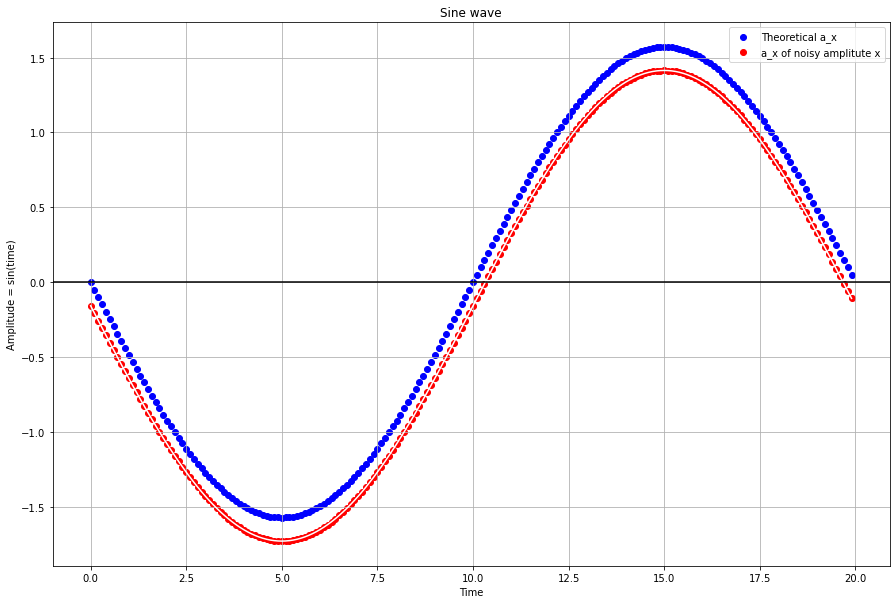

In [36]:


plot.scatter(time,a_x_predicted,color ='blue',label = 'Theoretical a_x')

plot.scatter(time,a_x_noisy_predicted,color ='red',label =  'a_x of noisy amplitute x')

plot.plot(time,a_x_noisy_predicted,color ='white')

plot.rcParams["figure.figsize"] = (15,10)

plot.title('Sine wave')

plot.xlabel('Time')

plot.ylabel('Amplitude = sin(time)')

plot.grid(True, which='both')

plot.axhline(y=0, color='k')

plot.legend()

plot.show()

### How we can test it?

    Metric from network should not be considered as a accurate test result such that there is overfitting for this specific case 

I tested the result with my colleagues who has implemented abovementioned method one and we got same result. 

Another way of testing is just taking the data from real life accelerometer,

Thus,

    gps signal of unregularized car action ( amplitute x,y ) - > model() - > acceleration derivation - > comparator (model.output, accelerometer.result) 
    
Should give us well done test results